***GradientBoostingRegressor***

In [274]:
from sklearn.ensemble import GradientBoostingRegressor

In [275]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


In [276]:
housing=fetch_california_housing()

In [277]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [278]:
housing.target_names

['MedHouseVal']

In [279]:
features=pd.DataFrame(housing.data,columns=housing.feature_names)
features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [280]:
label=pd.Series(housing.target,name='MedHouseVal')

In [281]:
df=pd.concat([features,label],axis=1)
df.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [282]:
x=df.iloc[ : , : -1]
y=df.iloc[ : , -1 ]

In [283]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [284]:
model=GradientBoostingRegressor(n_estimators=200,learning_rate=0.5)

In [285]:
model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)

In [286]:
model.score(x_train,y_train)

0.8981646850274378

In [287]:
model.score(x_test,y_test)

0.8129573286554462

In [288]:
pred_y=model.predict(x_test)

In [289]:
print(f'MAE:{mean_absolute_error(y_test,pred_y)}')
print(f'MSE:{mean_squared_error(y_test,pred_y)}')
print(f'Median AE:{median_absolute_error(y_test,pred_y)}')

MAE:0.3338503543928468
MSE:0.25356279283842403
Median AE:0.22031104820181738


***GradientBoostingClassifier***

In [290]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [291]:
data=pd.read_csv('../data/heart.csv')
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1


In [292]:
data.isna().sum( )

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [293]:
input=data.iloc[ : , : -1]
output=data.iloc[ : ,-1]

In [294]:
output


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [295]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.2,random_state=10)

In [296]:
model=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=6)

In [297]:
model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=300)

In [298]:
model.score(x_train,y_train)

1.0

In [299]:
model.score(x_test,y_test)

0.8360655737704918

In [300]:
pred=model.predict(x_test)

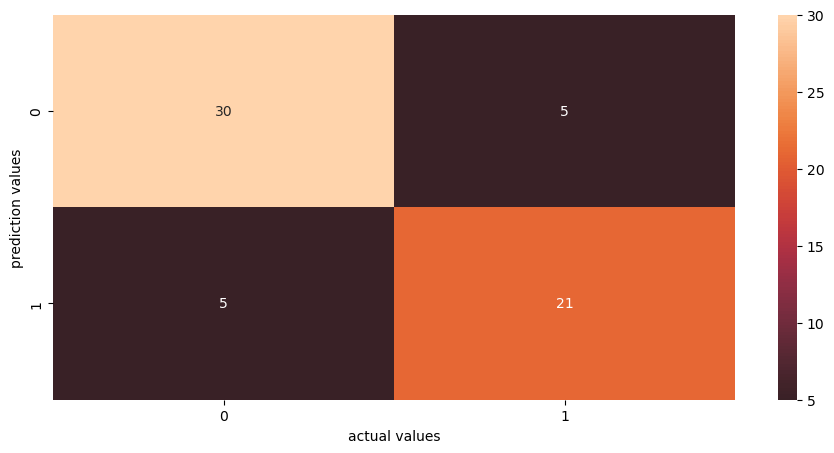

In [301]:
plt.figure(figsize=(11,5))
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,center=True)
plt.xlabel('actual values')
plt.ylabel('prediction values')
plt.show()